# Critical temperature risk detection 

## Superconductivity (critical temperature)

# Phases
A typical data science project has several phases (Cross-Industry Standard Process for Data Mining (CRISP-DM)). Phases adapted to this project
1) Business Understanding: Understand the business problem and define the objectives of the project.

2) Data Understanding: Understand the data and its structure. We look at the data types, missing values, and other characteristics of the data. Discover and visualize the data to gain insights.
- Load Data
- PCA for reducing features (Need for?)
- Exploratory Data Analysis (EDA): Data Analysis Process with estatistical analysis and data visualization for knowing data and obtain findings
a) Data Exploration: Examining summary statistics, visualizing data distributions, and identifying patterns or relationships.
b) Data Visualization: Presenting insights through plots, charts, and graphs to communicate findings effectively

3) Data Preparation: Prepare the data for modeling by cleaning it up and transforming it into a format that can be used by machine learning algorithms.  
- Data Cleaning: Handling missing values and categorical values, removing outliers and duplicates, and ensuring data quality.
- Data Transforming
- Feature Engineering: Transforming variables, creating new features, or selecting relevant variables for analysis.
-- Feature selection: selecting the most useful features to train on among existing features. 
-- Feature extraction: combining existing features to produce a more useful one (e.g. handling missing data, encoding variables, dealing with categorical variables, dimensionality reduction algorithms ...). 
-- Creating new features by gathering new data.
- PCA for reducing features (or in the begining after loading data) (need for?)
- Data Visualization after Data Preparation: Presenting insights through plots, charts, and graphs to communicate findings effectively

4) Modeling / Select and Train Models: We create a model that can be used to make predictions or classify new data. 
- Retrieve Class (y) from the dataset (X)
- Split Data
- Normal Test
- OverSampling (SMOTE) and undersampling (need for?)
- Calculate the weights for each sample based on the feature (transaction amount) and class weight (need for?)
- Intermediate Results (need for?)
- Train model (w/cross-validate) (based on OverSampling (SMOTE) and undersampling) (need for?)

5) Evaluation: We evaluate the model’s performance and determine whether it meets the business objectives.
- Evaluation using cross-validate
- Fine-tune Models  
- Model Evaluation on Test Set

6) Deployment Deploy the model into production and monitor its performance over time.

Note: The exploratory data analysis (EDA) is mainly on 2) Data Understanding, but also a bit on 3) Data Preparation

# 1) Business Understanding
Understand the business problem and define the objectives of the project.

Aim:
- Detect risk of critical temperature in materials, through supervised machine learning, testing 6 classification models and 6 regression models (w/CV) and their hyperparameters

- Provide the best possible regression and classification models using Decision Trees and Linear models
- Models should examine different hyperparameters and select the best one
- It is expected a full testing and validation cycle of model selection and evaluation

Objective 1
- Produce the best regression model for critical_temp (Dependent Variable)

Objective 2
- Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases

Analyze:

Classification model  
- RandomForest              
- GradientBoosting                                    
- DecisionTree                                        
- LogisticRegression                                  
- SVC
- GaussianNB

Regression model  
- RandomForest_Regr
- LinearModel_Trees
- DecisionTree_Regr
- GradBoosted_Regr_Trees
- SVC
- Linear_Regr_Tree 



# 2) Data Understanding
Understand the data and its structure. We look at the data types, missing values, and other characteristics of the data. Discover and visualize the data to gain insights.

## Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


## Load Data

- Read UCI Supercoductivity Data from csv/tsv file
- Add targuet for Objective 2

### Read  file

In [2]:
# Read  file
PathFileName = 'HA1-DatasetScaled.tsv'

Supercoductivity_df_full = pd.read_csv(PathFileName, sep="\t") #dataset with all transactions (train&test)

# dataframe shape 
print ( f" \n Supercoductivity_df_full shape {Supercoductivity_df_full.shape} \n")

# show first 5 column
print (f" Supercoductivity_df_full.head() \n {Supercoductivity_df_full.head()}")


 
 Supercoductivity_df_full shape (21174, 82) 

 Supercoductivity_df_full.head() 
    number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0             -2.1737           -2.5469               -1.8316   
1             -2.1737           -2.5469               -1.8316   
2             -2.1737           -2.5469               -1.8316   
3             -2.1737           -2.5469               -1.8316   
4             -2.1737           -1.5994               -0.9850   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0            -1.9110                -1.2742              -3.2043   
1            -1.9110                -1.2742              -3.2043   
2            -1.9110                -1.2742              -3.2043   
3            -1.9110                -1.2742              -3.2043   
4            -1.0041                -0.5006              -3.2043   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                  -2.6712            -2.1218

### Add targuet for Objective 2
Objective 2
- Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases

In [3]:
Supercoductivity_df_full['critical_temp_high'] = (Supercoductivity_df_full['critical_temp'] >= 80.0).astype(int)

# dataframe shape 
print ( f" \n Supercoductivity_df_full shape {Supercoductivity_df_full.shape} \n")

# show first 5 column
print (f" Supercoductivity_df_full.head() \n {Supercoductivity_df_full.head()}")

 
 Supercoductivity_df_full shape (21174, 83) 

 Supercoductivity_df_full.head() 
    number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0             -2.1737           -2.5469               -1.8316   
1             -2.1737           -2.5469               -1.8316   
2             -2.1737           -2.5469               -1.8316   
3             -2.1737           -2.5469               -1.8316   
4             -2.1737           -1.5994               -0.9850   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0            -1.9110                -1.2742              -3.2043   
1            -1.9110                -1.2742              -3.2043   
2            -1.9110                -1.2742              -3.2043   
3            -1.9110                -1.2742              -3.2043   
4            -1.0041                -0.5006              -3.2043   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                  -2.6712            -2.1218

## 2b) Exploratory Data Analysis (EDA)
Data Analysis Process with estatistical analysis and data visualization for knowing data and obtain findings

a) Data Exploration: Examining summary statistics, visualizing data distributions, and identifying patterns or relationships.
i) Get a quick description of the data: (info (), for categorical atributes use value_counts())
- total number of rows
- each attribute’s type 
-- understand the non numeric 
-- categorical attribute: find out what categories exist and how many (value_counts())
--- Group Data: Understanding  effect of different categorical attributes on other data variables.
---- Group by: (DF.groupby(['education', 'vote']).mean() )
---- or pivotable...
- Check of non-null

ii) Descriptive Statistics (describe ())
- summary of the numerical attributes 
-- Check for outliers: Significant difference between the mean and the median values. This is because there are some outliers in our data and the mean is influenced by the presence of outliers.
- feature target-wise statistical analysis

b) Data Visualization: Visualizing data distributions, and identifying patterns or relationships. Presenting insights through plots, charts, and graphs to communicate findings effectively.
- Visualizing Geographical Data (Long, Lat)

i) Histograms (for each numerical attribute). 
- Number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
- Explore  feature scaling
- Analyze the creation of category attribute 

ii) Check for outliers: Identify outliers and anomalies in the data.
box plots and other visualizations to identify these values.
sns.boxplot(df['variable'])

iii) Check for duplicates

iv) Looking for correlations: identify patterns and relationships in the data. Correlations between variables and create scatter plots to visualize these relationships (multivariate: investigate the relationships between the variables)
- Looking for correlations (corr)
- Heatmap for correlations
- details with scatter_matrix

- Univariate analysis can be done for both Categorical and Numerical variables. Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc. Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.
-- Distribution Plots (also called probability density function or PDF plots): FacetGrid
-- Box plots (feature with target)
-- Violin plots (feature with target) and underlying distribution

- Multivariate/Bi-variate: investigate the relationships between the variables (Bi-variate=2 data variables),  can be shown with the help of various plots like Scatter Plot, pairplot, Line plot,  Histogram(summary) plot, box plots, violin plot, etc heatmap....
-- pairplot
-- pairplot2
-- joint plot (Bi-variate): 
While the Pair plot provides a visual insight into all possible correlations, the Joint plot provides bivariate plots with univariate marginal distributions.
-- Multivariate analysis with Contour plot: A contour plot is a graphical technique for representing a 3-dimensional surface by plotting constant z slices, called contours, in a 2-dimensional format. A contour plot enables us to visualize data in a two-dimensional plot. Here is a diagrammatic representation of how the information from the 3rd dimension can be consolidated into a flat 2-D chart

- ANOVA stands for Analysis of Variance: relation between the different group of categorical data.
- Categorical variables are being visualized using a count plot.

PS: It is almost always a good idea to perform univariate EDA on each of the components of a multivariate EDA before performing the multivariate EDA.

v)  Experimenting with Attribute Combinations
data['PopulationInMillions'] = data['Population']/1000000

vi) Findings

----
Notes:
A) ANOVA stands for Analysis of Variance. It is performed to figure out the relation between the different group of categorical data. Under ANOVA we have two measures as result: 
–-- F-testscore : which shows the variation of groups mean over variation 
–-- p-value: it shows the importance of the result 
The p-value is the probability of obtaining the observed F-statistic or a more extreme value if the null hypothesis (i.e., the means of all groups are equal) is true.
Based on the p-value, we can make a conclusion about the significance of the differences between the groups. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there are significant differences between the groups. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is not enough evidence to conclude that there are significant differences between the groups.
This can be performed using python module scipy method name f_oneway() 
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(group1, group2, group3)
print("F-statistic:", f_statistic)
print("p-value:", p_value)
Correlation and Correlation computation
We can say there is a strong correlation between two variables when Pearson correlation coefficient is close to either 1 or -1 and the p-value is less than 0.0001

B) Categorical variables are being visualized using a count plot.
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue', 
              order = data['Transmission'].value_counts().index);
...
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);

C) The four types of EDA are 
1) univariate non-graphical, 
2) multivariate nongraphical, 
3) univariate graphical
- Distribution Plots (also called probability density function or PDF plots)
Which among these 3 variables is more useful than other variables in order to distinguish between the class labels ‘yes’ and ‘no’? To answer this, we’ll plot the distribution plots with each feature as a variable on X-axis. The values on the Y-axis in each case represent the normalized density.
sns.FacetGrid(df, hue = "survival_status").map(sns.distplot, "patient_age").add_legend()
plt.show()
observations?
- Box plots and Violin plots
-- A violin plot displays the same information as the box and whisker plot; additionally, it also shows the density-smoothed plot of the underlying distribution.


4) multivariate graphical.
multivariate: investigate the relationships between the variables.
- univariate non-graphical, 
. The usual goal of univariate non-graphical EDA is to better appreciate the “sample distribution” and also to make some tentative conclusions about what population distribution(s) is/are compatible with the sample distribution. 
. Outlier detection is also a part of this analysis.
- multivariate graphical.
Other common sorts of multivariate graphics are:
Scatterplot: For 2 quantitative variables, the essential graphical EDA technique is that the scatterplot , sohas one variable on the x-axis and one on the y-axis and therefore the point for every case in your dataset.
Run chart:  It’s a line graph of data plotted over time.
Heat map:  It’s a graphical representation of data where values are depicted by color.
Multivariate chart: It’s a graphical representation of the relationships between factors and response.
Bubble chart: It’s a data visualization that displays multiple circles (bubbles) in two-dimensional plot.

- Pair plot (Bi-variate)
Plot a pair plot to visualize the relationship between the features in a pairwise manner. A pair plot enables us to visualize both distributions of single variables as well as the relationship between pairs of variables.
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'survival_status')
plt.show()
As we can observe in the above pair plot, there is a high overlap between any two features and hence no clear distinction can be made between the class labels based on the feature pairs.

- joint plot (Bi-variate)
While the Pair plot provides a visual insight into all possible correlations, the Joint plot provides bivariate plots with univariate marginal distributions.
sns.jointplot(x = 'patient_age', y = 'positive_axillary_nodes', data = df)
plt.show()

- Multivariate analysis with Contour plot
A contour plot is a graphical technique for representing a 3-dimensional surface by plotting constant z slices, called contours, in a 2-dimensional format
sns.jointplot(x = 'patient_age',  y = 'operation_year' , data = df,  kind = 'kde', fill = True)
plt.show()

- Heatmap
Heatmaps are used to observe the correlations among the feature variables. This is particularly important when we are trying to obtain the feature importance in regression analysis. 
sns.heatmap(df.corr(), cmap = ‘YlGnBu’, annot = True)
plt.show()
The values in the cells are Pearson’s R values which indicate the correlation among the feature variables. As we can see, these values are nearly 0 for any pair, so no correlation exists among any pair of variables.

A heat map is widely been used for Multivariate Analysis
Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

- bar plot (bivariate analysis)
A bar plot can be used to show the relationship between Categorical variables and continuous variables
bar plot can be used to show the relationship between Categorical variables and continuous variables 

fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

- experiment plots...
https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
https://www.analyticsvidhya.com/blog/2021/08/exploratory-data-analysis-and-visualization-techniques-in-data-science

### a) Data Exploration: 
Examining summary statistics, visualizing data distributions, and identifying patterns or relationships.

#### i) Get a quick description of the data
(info (), for categorical atributes use value_counts())
- total number of rows
- each attribute’s type 
-- understand the non numeric 
-- categorical attribute: find out what categories exist and how many (value_counts())
--- Group Data: Understanding  effect of different categorical attributes on other data variables.
---- Group by: (DF.groupby(['education', 'vote']).mean() )
---- or pivotable...
- Check of non-null

In [4]:
print (Supercoductivity_df_full.info()) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21174 entries, 0 to 21173
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21174 non-null  float64
 1   mean_atomic_mass                 21174 non-null  float64
 2   wtd_mean_atomic_mass             21174 non-null  float64
 3   gmean_atomic_mass                21174 non-null  float64
 4   wtd_gmean_atomic_mass            21174 non-null  float64
 5   entropy_atomic_mass              21174 non-null  float64
 6   wtd_entropy_atomic_mass          21174 non-null  float64
 7   range_atomic_mass                21174 non-null  float64
 8   wtd_range_atomic_mass            21174 non-null  float64
 9   std_atomic_mass                  21174 non-null  float64
 10  wtd_std_atomic_mass              21174 non-null  float64
 11  mean_fie                         21174 non-null  float64
 12  wtd_mean_fie      

#### ii) Descriptive Statistics (describe ())
- summary of the numerical attributes 
-- Check for outliers: Significant difference between the mean and the median values. This is because there are some outliers in our data and the mean is influenced by the presence of outliers

In [7]:
Supercoductivity_df_full.describe ()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,critical_temp_high
count,21174.000000,2.117400e+04,2.117400e+04,2.117400e+04,2.117400e+04,21174.000000,2.117400e+04,21174.000000,21174.000000,2.117400e+04,...,2.117400e+04,21174.000000,21174.000000,2.117400e+04,21174.000000,21174.000000,21174.000000,21174.000000,21174.000000,21174.000000
mean,0.000011,3.400397e-07,8.500992e-08,-8.264853e-07,-3.730991e-07,0.000003,-8.595447e-07,-0.000007,0.000001,-7.556437e-07,...,3.683763e-07,-0.000001,-0.000002,5.147823e-07,0.000003,0.000001,0.000007,-0.000005,34.558934,0.167611
std,1.000028,1.000024e+00,1.000024e+00,1.000025e+00,1.000024e+00,1.000023,1.000025e+00,1.000026,1.000023,1.000024e+00,...,1.000020e+00,1.000022,1.000019,1.000024e+00,1.000015,1.000023,1.000015,1.000029,34.256159,0.373530
min,-2.173700,-2.718000e+00,-2.000100e+00,-2.127200e+00,-1.551200e+00,-3.204300,-2.671200e+00,-2.121800,-1.252300,-2.220600e+00,...,-1.964200e+00,-1.752000,-3.312300,-2.785800e+00,-1.640600,-1.523500,-1.729700,-1.478200,0.000200,0.000000
25%,-0.781600,-5.073000e-01,-6.216750e-01,-4.255000e-01,-6.341000e-01,-0.522900,-7.054500e-01,-0.675800,-0.613500,-5.769000e-01,...,-7.418000e-01,-0.821700,-0.605400,-7.126000e-01,-0.836600,-0.573175,-0.797700,-0.805100,5.500000,0.000000
50%,-0.085600,-8.870000e-02,-3.669000e-01,-1.549000e-01,-5.077500e-01,0.088000,2.059000e-01,0.130700,-0.243000,3.450000e-02,...,-4.212000e-01,-0.529900,0.180700,3.018000e-01,-0.032500,-0.428800,-0.079200,-0.381300,20.000000,0.000000
75%,0.610400,4.354000e-01,3.973000e-01,2.154000e-01,3.994250e-01,0.760400,7.350750e-01,0.702800,0.201800,7.441000e-01,...,6.363000e-01,0.732900,0.742300,7.301000e-01,0.771500,0.445500,0.746000,0.760900,63.000000,0.000000
max,3.394400,4.102600e+00,4.109700e+00,4.453400e+00,4.155100e+00,2.240400,2.231700e+00,1.689800,6.570000,2.828000e+00,...,3.767100e+00,3.363100,2.153200,2.360900e+00,3.183600,5.677100,4.459700,5.104400,185.000000,1.000000


In [8]:
### feature target-wise statistical analysis

#Analyze each class....
Class_1 = Supercoductivity_df_full[Supercoductivity_df_full['critical_temp_high'] == 1]
print (f"Class_1 \n {Class_1.describe()}")

Class_0 = Supercoductivity_df_full[Supercoductivity_df_full['critical_temp_high'] == 0] 
print (f"Class_0 \n {Class_0.describe()}")

# From the above class-wise analysis, it can be observed that —

# change 1 -> yes and 2-> no
# df['survival_status'] = df['survival_status'].map({1:"yes", 2:"no"})

Class_1 
        number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count         3549.000000       3549.000000           3549.000000   
mean             0.714927         -0.020056             -0.298741   
std              0.661498          0.479459              0.478317   
min             -1.477700         -2.406900             -1.851200   
25%             -0.085600         -0.371700             -0.644000   
50%              0.610400          0.050100             -0.480100   
75%              1.306400          0.289600              0.056800   
max              3.394400          1.321900              1.743600   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count        3549.000000            3549.000000          3549.000000   
mean           -0.213854              -0.390576             0.618829   
std             0.332416               0.412262             0.480131   
min            -2.115400              -1.517200            -2.830000   
25%     

### b) Data Visualization 
Visualizing data distributions, and identifying patterns or relationships. Presenting insights through plots, charts, and graphs to communicate findings effectively.


#### i) Histograms 
for each numerical attribute

- Number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
- Explore  feature scaling
- Analyze the creation of category attribute 

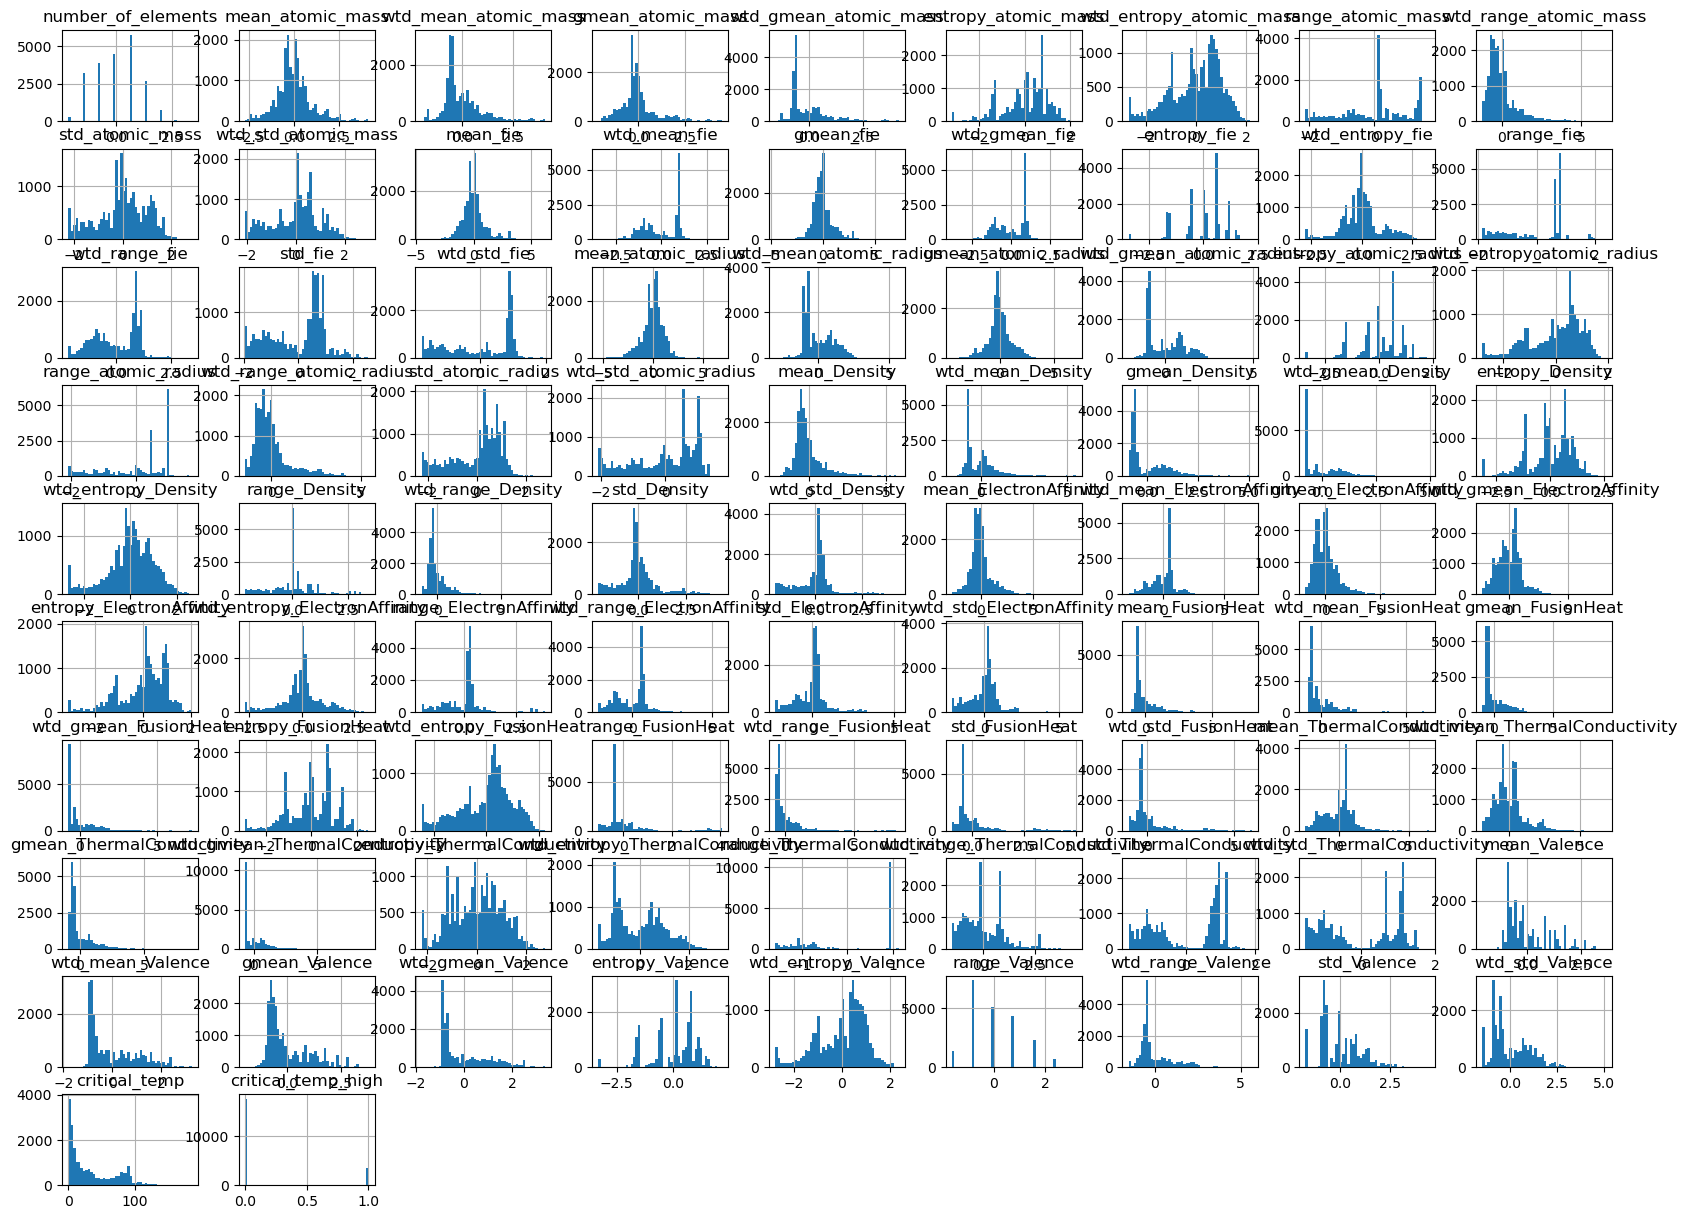

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt

Supercoductivity_df_full.hist(bins=50, figsize=(20,15))
plt.show()

#Result numerical features 

#### ii) Check for outliers
Identify outliers and anomalies in the data.

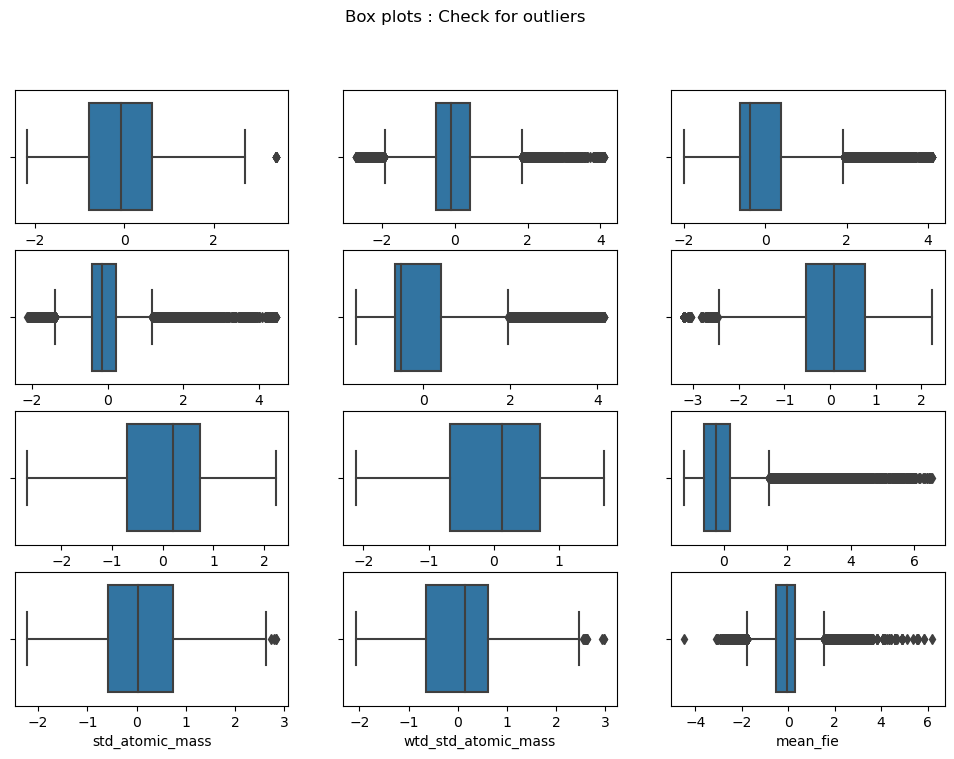

In [11]:
# Check for outliers
#first 12

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(12, 8))
sns.boxplot(x=Supercoductivity_df_full['number_of_elements'], ax=axs[0, 0])
sns.boxplot(x=Supercoductivity_df_full['mean_atomic_mass'], ax=axs[0, 1])
sns.boxplot(x=Supercoductivity_df_full['wtd_mean_atomic_mass'], ax=axs[0, 2])
sns.boxplot(x=Supercoductivity_df_full['gmean_atomic_mass'], ax=axs[1, 0])
sns.boxplot(x=Supercoductivity_df_full['wtd_gmean_atomic_mass'], ax=axs[1, 1])
sns.boxplot(x=Supercoductivity_df_full['entropy_atomic_mass'], ax=axs[1, 2])
sns.boxplot(x=Supercoductivity_df_full['wtd_entropy_atomic_mass'], ax=axs[2, 0])
sns.boxplot(x=Supercoductivity_df_full['range_atomic_mass'], ax=axs[2, 1])
sns.boxplot(x=Supercoductivity_df_full['wtd_range_atomic_mass'], ax=axs[2, 2])
sns.boxplot(x=Supercoductivity_df_full['std_atomic_mass'], ax=axs[3, 0])
sns.boxplot(x=Supercoductivity_df_full['wtd_std_atomic_mass'], ax=axs[3, 1])
sns.boxplot(x=Supercoductivity_df_full['mean_fie'], ax=axs[3, 2])
fig.suptitle('Box plots : Check for outliers')
plt.show()

# Result: treat outliers - Scaling
# StandardScaler is  less affected by outliers then min-max scaling for standardization. 
# min-max between 0 and 1 is better for choose features... since outliers does not exist...

#### iii) Check for duplicates

In [12]:
duplicates = Supercoductivity_df_full.duplicated().sum()
print(f"Supercoductivity_df_full.duplicated().sum() \n {duplicates} \n")

Supercoductivity_df_full.duplicated().sum() 
 70 



#### iv) Looking for correlations
identify patterns and relationships in the data. Correlations between variables and create scatter plots to visualize these relationships (multivariate: investigate the relationships between the variables)

In [13]:
print("Targuet 1")
corr_matrix = Supercoductivity_df_full.corr() 
#Now let’s look at how much each attribute correlates with the y value:
print (corr_matrix["critical_temp"].sort_values(ascending=False))

print("\n Targuet 2")
corr_matrix = Supercoductivity_df_full.corr() 
#Now let’s look at how much each attribute correlates with the y value:
print (corr_matrix["critical_temp_high"].sort_values(ascending=False))


Targuet 1
critical_temp                  1.000000
critical_temp_high             0.780504
wtd_std_ThermalConductivity    0.723885
range_ThermalConductivity      0.690854
std_ThermalConductivity        0.659737
                                 ...   
gmean_Density                 -0.539644
gmean_Valence                 -0.574771
mean_Valence                  -0.601432
wtd_gmean_Valence             -0.618376
wtd_mean_Valence              -0.634921
Name: critical_temp, Length: 83, dtype: float64

 Targuet 2
critical_temp_high             1.000000
critical_temp                  0.780504
wtd_std_ThermalConductivity    0.452456
range_ThermalConductivity      0.420253
std_ThermalConductivity        0.411498
                                 ...   
gmean_Density                 -0.294683
gmean_Valence                 -0.330467
mean_Valence                  -0.351577
wtd_gmean_Valence             -0.357518
wtd_mean_Valence              -0.370779
Name: critical_temp_high, Length: 83, dtype: float

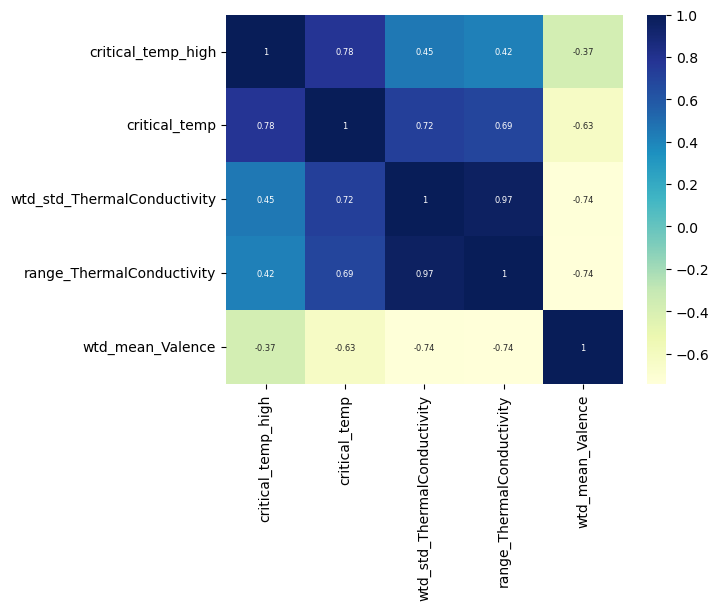

In [14]:
# A heat map is widely been used for Multivariate Analysis
# Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

# Heatmaps are used to observe the correlations among the feature variables. This is particularly important 
# when we are trying to obtain the feature importance in regression analysis. Although correlated features do not 
# impact the performance of the statistical model, it could mess up the post-modeling analysis.
# Let’s see if there exist any correlation among our features by plotting a heatmap.
# The values in the cells are Pearson’s R values which indicate the correlation among the feature variables. 

# for the most correlated positive and negative
Supercoductivity_df_full2 = Supercoductivity_df_full[["critical_temp_high","critical_temp","wtd_std_ThermalConductivity","range_ThermalConductivity","wtd_mean_Valence"]]

sns.heatmap(Supercoductivity_df_full2.corr(), cmap = 'YlGnBu', annot = True,annot_kws={"size": 6}) #vmin = -1, vmax = 1
plt.show()

array([[<Axes: xlabel='critical_temp', ylabel='critical_temp'>,
        <Axes: xlabel='wtd_std_ThermalConductivity', ylabel='critical_temp'>,
        <Axes: xlabel='range_ThermalConductivity', ylabel='critical_temp'>,
        <Axes: xlabel='std_ThermalConductivity', ylabel='critical_temp'>,
        <Axes: xlabel='wtd_mean_Valence', ylabel='critical_temp'>],
       [<Axes: xlabel='critical_temp', ylabel='wtd_std_ThermalConductivity'>,
        <Axes: xlabel='wtd_std_ThermalConductivity', ylabel='wtd_std_ThermalConductivity'>,
        <Axes: xlabel='range_ThermalConductivity', ylabel='wtd_std_ThermalConductivity'>,
        <Axes: xlabel='std_ThermalConductivity', ylabel='wtd_std_ThermalConductivity'>,
        <Axes: xlabel='wtd_mean_Valence', ylabel='wtd_std_ThermalConductivity'>],
       [<Axes: xlabel='critical_temp', ylabel='range_ThermalConductivity'>,
        <Axes: xlabel='wtd_std_ThermalConductivity', ylabel='range_ThermalConductivity'>,
        <Axes: xlabel='range_ThermalConducti

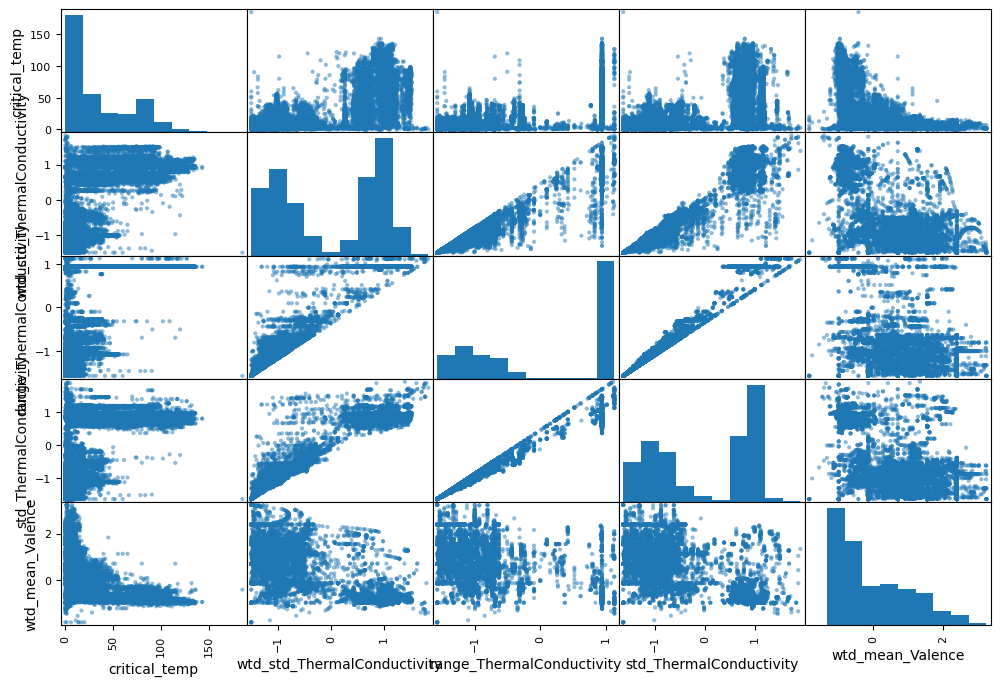

In [15]:
#  let’s just focus on a few promising attributes that seem most correlated with the critical_temp 

from pandas.plotting import scatter_matrix 

attributes = ["critical_temp", "wtd_std_ThermalConductivity", "range_ThermalConductivity", "std_ThermalConductivity","wtd_mean_Valence"] 
scatter_matrix(Supercoductivity_df_full[attributes], figsize=(12, 8)) 


<Axes: xlabel='range_atomic_radius', ylabel='critical_temp'>

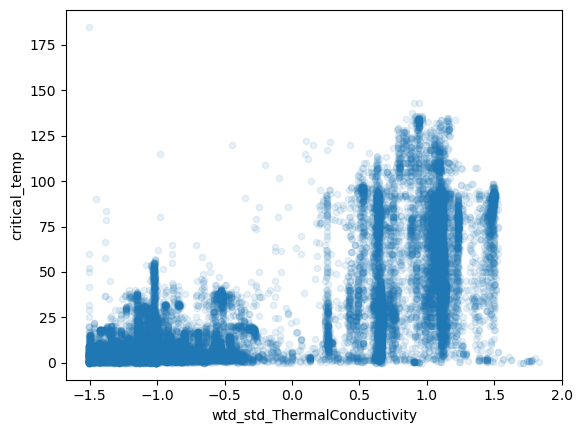

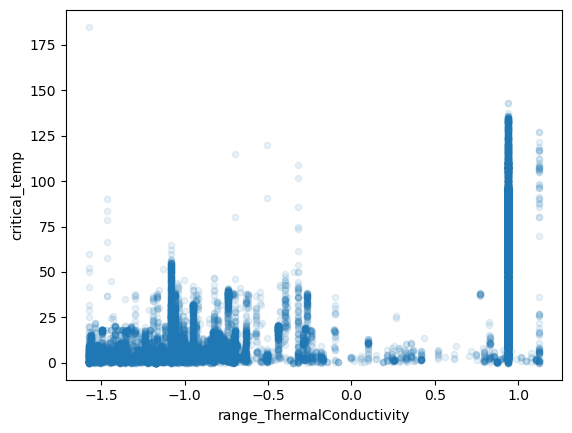

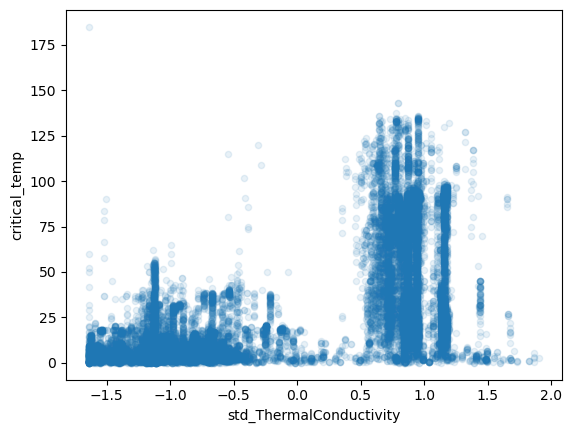

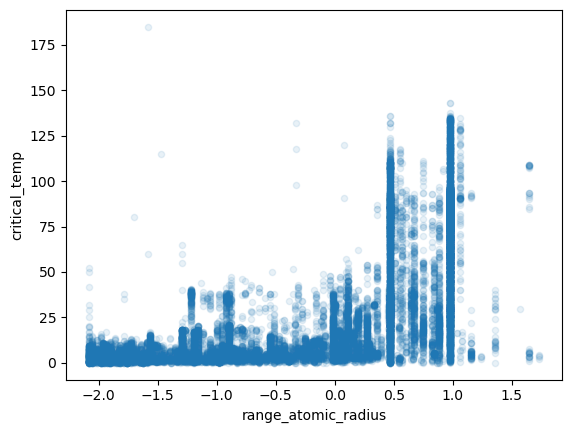

In [16]:
# zoom most promising attribute to predict the critical_temp 
attributes = ["critical_temp", "wtd_std_ThermalConductivity", "range_ThermalConductivity", "std_ThermalConductivity","range_atomic_radius"] 

Supercoductivity_df_full.plot(kind="scatter", x="wtd_std_ThermalConductivity", y="critical_temp", alpha=0.1)
Supercoductivity_df_full.plot(kind="scatter", x="range_ThermalConductivity", y="critical_temp", alpha=0.1)
Supercoductivity_df_full.plot(kind="scatter", x="std_ThermalConductivity", y="critical_temp", alpha=0.1)
Supercoductivity_df_full.plot(kind="scatter", x="range_atomic_radius", y="critical_temp", alpha=0.1)
# Result direct proporcionality from features with critical_temp


<Axes: xlabel='range_atomic_radius', ylabel='critical_temp_high'>

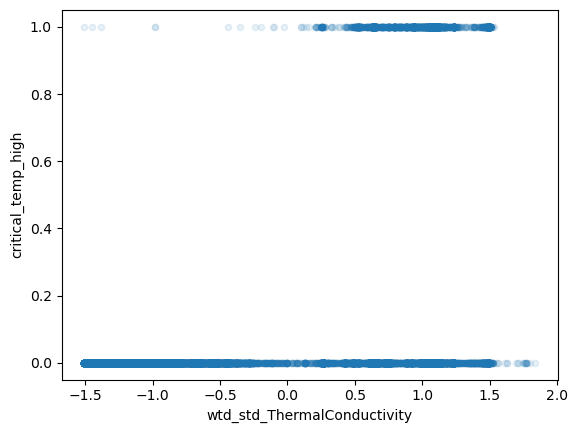

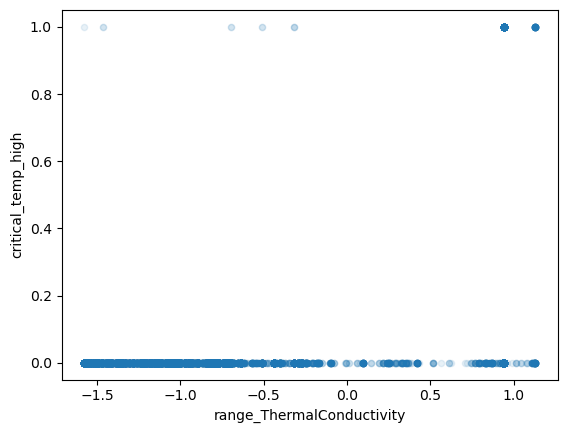

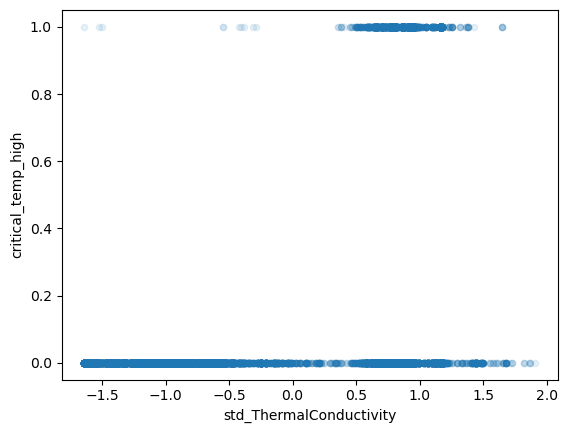

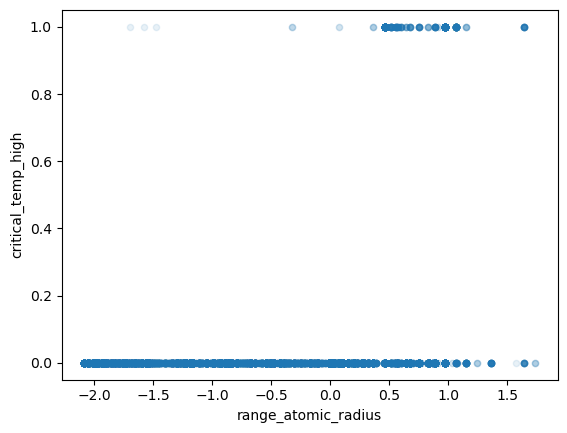

In [12]:
# zoom most promising attribute to predict the critical_temp_high
attributes = ["critical_temp_high", "wtd_std_ThermalConductivity", "range_ThermalConductivity", "std_ThermalConductivity","range_atomic_radius"] 

Supercoductivity_df_full.plot(kind="scatter", x="wtd_std_ThermalConductivity", y="critical_temp_high", alpha=0.1)
Supercoductivity_df_full.plot(kind="scatter", x="range_ThermalConductivity", y="critical_temp_high", alpha=0.1)
Supercoductivity_df_full.plot(kind="scatter", x="std_ThermalConductivity", y="critical_temp_high", alpha=0.1)
Supercoductivity_df_full.plot(kind="scatter", x="range_atomic_radius", y="critical_temp_high", alpha=0.1)
# Result direct proporcionality from features with critical_temp


##### Univariate graphical analysis

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\lib\site

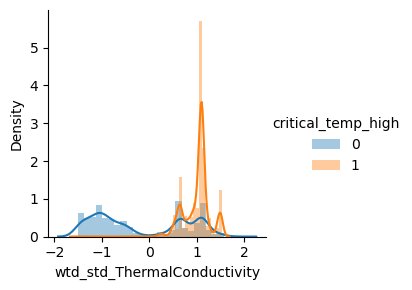

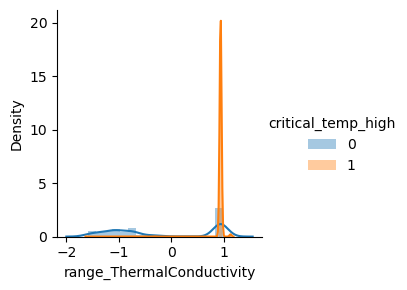

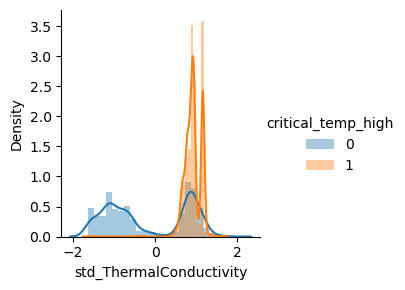

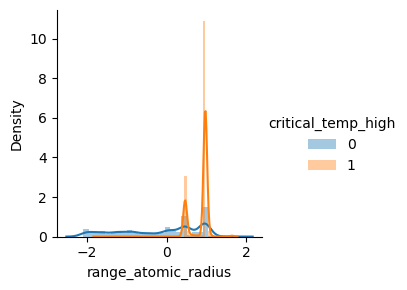

In [17]:
# Distribution Plots (also called probability density function or PDF plots)
# Which among the features is more useful than other variables in order to distinguish between
# the class labels ‘1’ and ‘0’? To answer this, we’ll plot the distribution plots with each feature as a 
#variable on X-axis. The values on the Y-axis in each case represent the normalized density.

sns.FacetGrid(Supercoductivity_df_full, hue = "critical_temp_high").map(sns.distplot, "wtd_std_ThermalConductivity").add_legend() # distplot displot
sns.FacetGrid(Supercoductivity_df_full, hue = "critical_temp_high").map(sns.distplot, "range_ThermalConductivity").add_legend() # distplot displot
sns.FacetGrid(Supercoductivity_df_full, hue = "critical_temp_high").map(sns.distplot, "std_ThermalConductivity").add_legend() # distplot displot
sns.FacetGrid(Supercoductivity_df_full, hue = "critical_temp_high").map(sns.distplot, "range_atomic_radius").add_legend() # distplot displot
plt.show()

# Results: Distinct layers wtd_std_ThermalConductivity>~0,5 <~1,5 -> critical_temp_high ~1; range_ThermalConductivity ~1 -> critical_temp_high ~1; std_ThermalConductivity>~0.5 <~1,5 -> critical_temp_high ~1;

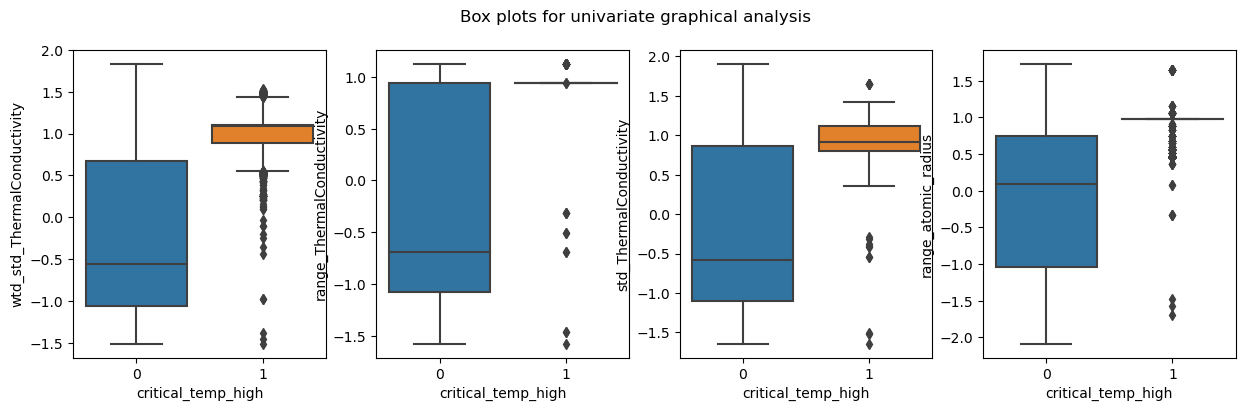

In [18]:
# Box plots Univariate (feature with target)

plt.figure(figsize = (15, 4))
plt.subplot(1,4,1)
sns.boxplot(x = 'critical_temp_high', y = 'wtd_std_ThermalConductivity', data = Supercoductivity_df_full)
plt.subplot(1,4,2)
sns.boxplot(x = 'critical_temp_high', y = 'range_ThermalConductivity', data = Supercoductivity_df_full)
plt.subplot(1,4,3)
sns.boxplot(x = 'critical_temp_high', y = 'std_ThermalConductivity', data = Supercoductivity_df_full)
plt.subplot(1,4,4)
sns.boxplot(x = 'critical_temp_high', y = 'range_atomic_radius', data = Supercoductivity_df_full)

# Add a title to the entire figure
plt.suptitle('Box plots for univariate graphical analysis')
plt.show()


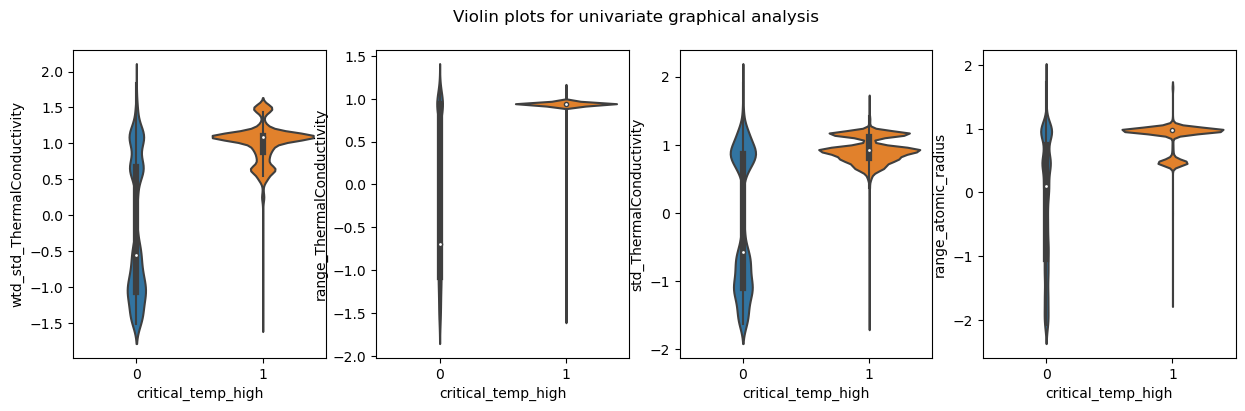

In [19]:
# Violin plots in general are more informative as compared to the box plots as violin plots also represent
# the underlying distribution of the data in addition to the statistical summary. 
plt.figure(figsize = (15, 4))
plt.subplot(1,4,1)
sns.violinplot(x = 'critical_temp_high', y = 'wtd_std_ThermalConductivity', data = Supercoductivity_df_full)
plt.subplot(1,4,2)
sns.violinplot(x = 'critical_temp_high', y = 'range_ThermalConductivity', data = Supercoductivity_df_full)
plt.subplot(1,4,3)
sns.violinplot(x = 'critical_temp_high', y = 'std_ThermalConductivity', data = Supercoductivity_df_full)
plt.subplot(1,4,4)
sns.violinplot(x = 'critical_temp_high', y = 'range_atomic_radius', data = Supercoductivity_df_full)

# Add a title to the entire figure
plt.suptitle('Violin plots for univariate graphical analysis')
plt.show()

# Results: Distinct layers: mainly in PVC3 and PCV4 in relation witn Class: 0,1
# Results: Distinct layers wtd_std_ThermalConductivity>~0,5 <~1,5 -> critical_temp_high ~1; range_ThermalConductivity ~1 -> critical_temp_high ~1; std_ThermalConductivity>~0.5 <~1,5 -> critical_temp_high ~1;

####  multivariate (bi-variate): investigate the relationships between the variables
Multivariate/Bivariate: investigate the relationships between the variables,  can be shown with the help of various plots like Scatter Plot, pairplot, Line plot,  Histogram(summary) plot, box plots, violin plot, etc heatmap....


In [20]:
from collections import Counter

# summarize class distribution
counter = Counter(Supercoductivity_df_full['critical_temp_high'])
print(counter)
print('Positive class corresponds to', counter[1]/(counter[0]+counter[1])*100,'% of the dataset.')

Counter({0: 17625, 1: 3549})
Positive class corresponds to 16.761122130915275 % of the dataset.


In [21]:
Supercoductivity_df_full['critical_temp'].value_counts()


80.000    143
20.000    129
30.000    125
90.000    122
40.000    111
         ... 
18.230      1
80.310      1
11.890      1
12.340      1
0.596       1
Name: critical_temp, Length: 2972, dtype: int64

In [22]:
Supercoductivity_df_full['critical_temp_high'].value_counts()


0    17625
1     3549
Name: critical_temp_high, dtype: int64

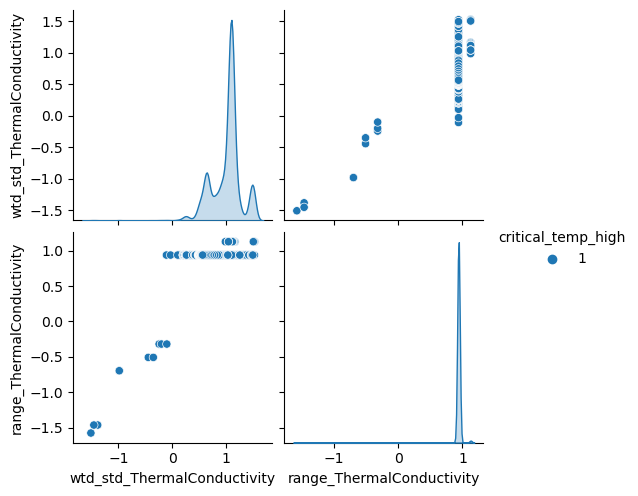

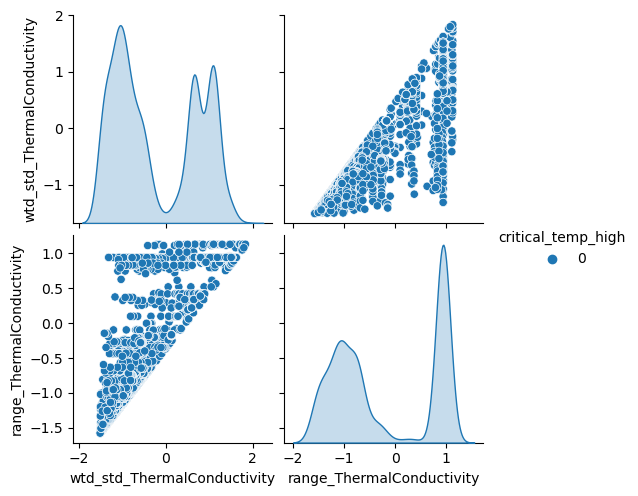

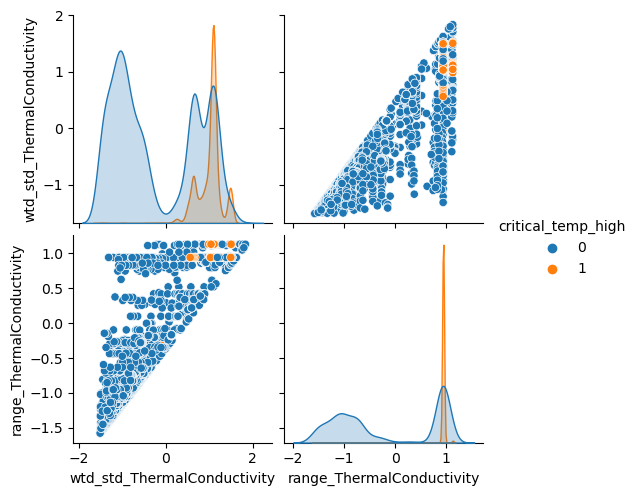

In [14]:
# multivariate: investigate the relationships between the variables

#just for 1
sns.pairplot(Supercoductivity_df_full [Supercoductivity_df_full['critical_temp_high'] == 1], vars=['wtd_std_ThermalConductivity', 'range_ThermalConductivity'], hue='critical_temp_high')
#Result Fraud amount is low mainly 0,00 to 0,02 and lower to 0,004

#just for 0
sns.pairplot(Supercoductivity_df_full [Supercoductivity_df_full['critical_temp_high'] == 0], vars=['wtd_std_ThermalConductivity', 'range_ThermalConductivity'], hue='critical_temp_high')

#all
sns.pairplot(Supercoductivity_df_full , vars=['wtd_std_ThermalConductivity', 'range_ThermalConductivity'], hue='critical_temp_high')


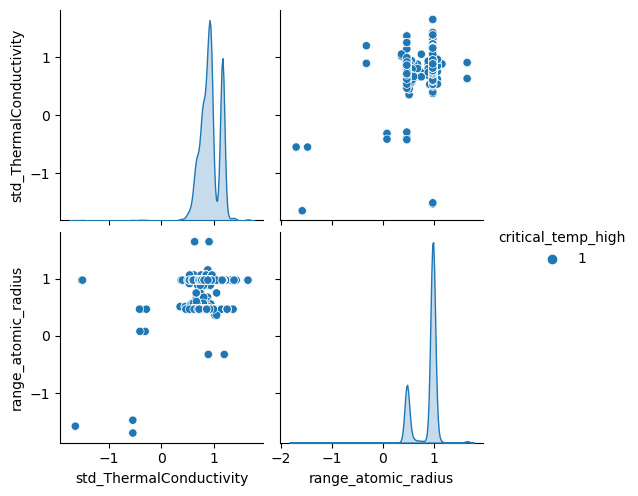

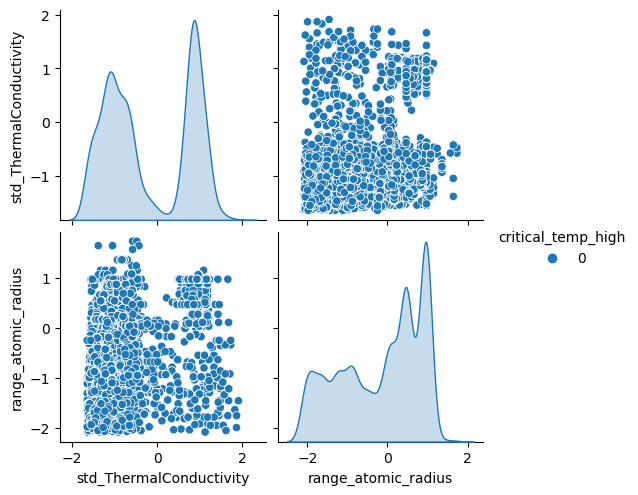

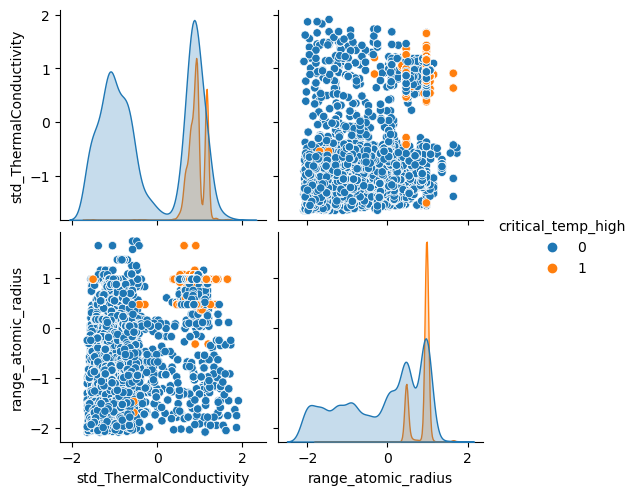

In [15]:
# multivariate: investigate the relationships between the variables

#just for 1
sns.pairplot(Supercoductivity_df_full [Supercoductivity_df_full['critical_temp_high'] == 1], vars=['std_ThermalConductivity', 'range_atomic_radius'], hue='critical_temp_high')
#Result Fraud amount is low mainly 0,00 to 0,02 and lower to 0,004

#just for 0
sns.pairplot(Supercoductivity_df_full [Supercoductivity_df_full['critical_temp_high'] == 0], vars=['std_ThermalConductivity', 'range_atomic_radius'], hue='critical_temp_high')

#all
sns.pairplot(Supercoductivity_df_full , vars=['std_ThermalConductivity', 'range_atomic_radius'], hue='critical_temp_high')


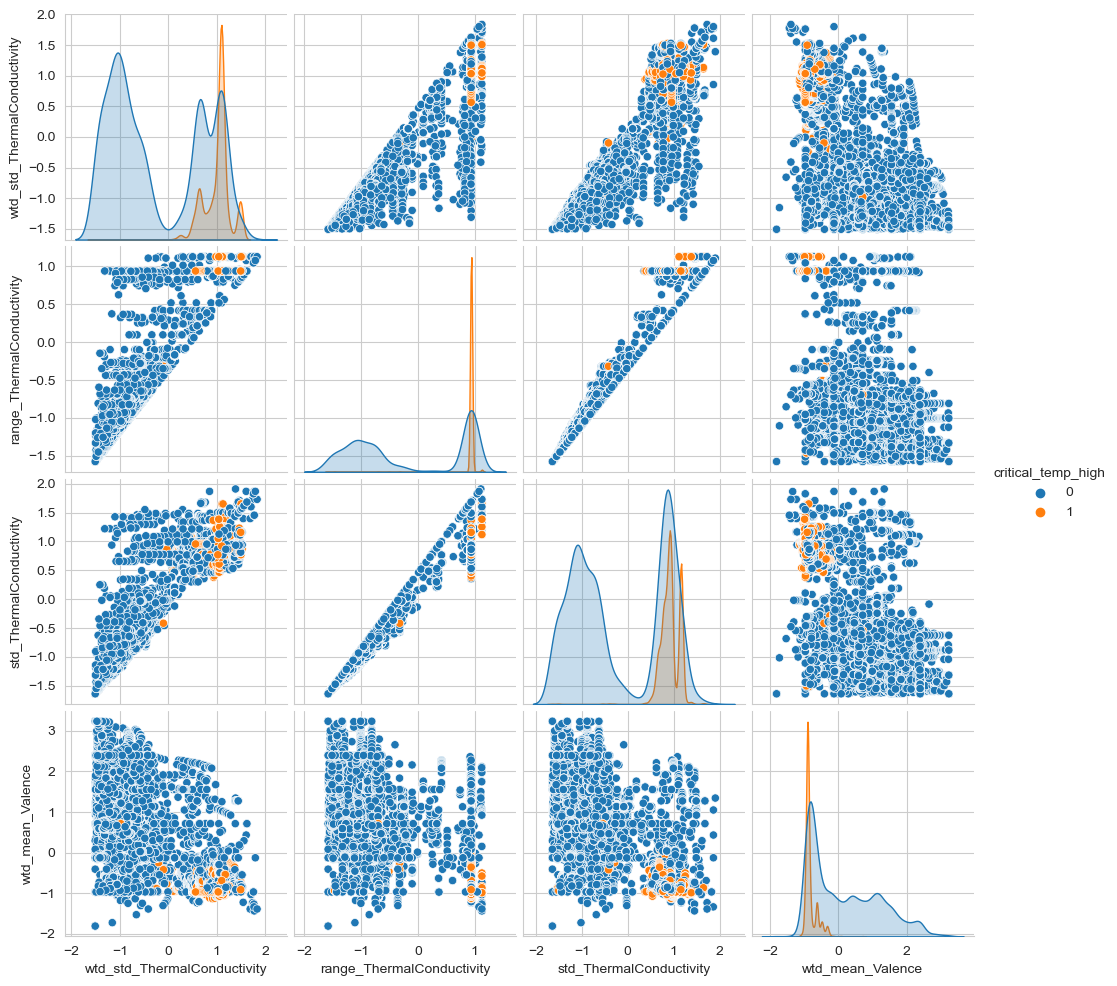

In [23]:
# Pair plot
# Plot a pair plot to visualize the relationship between the features in a pairwise manner. 
# A pair plot enables us to visualize both distributions of single variables as well as the relationship between 
# pairs of variables.

sns.set_style('whitegrid')

attributes = ["critical_temp", "wtd_std_ThermalConductivity", "range_ThermalConductivity", "std_ThermalConductivity","wtd_mean_Valence"] 

#for the most correlated positive and negative
Supercoductivity_df_full2 = Supercoductivity_df_full[["critical_temp_high","wtd_std_ThermalConductivity","range_ThermalConductivity","std_ThermalConductivity", "wtd_mean_Valence"]]

sns.pairplot(Supercoductivity_df_full2, hue = 'critical_temp_high')
plt.show()

# As we can observe in the above pair plot, there is a low overlap between any two features and hence almoust a clear distinction can be made between the class labels based on the feature pairs.

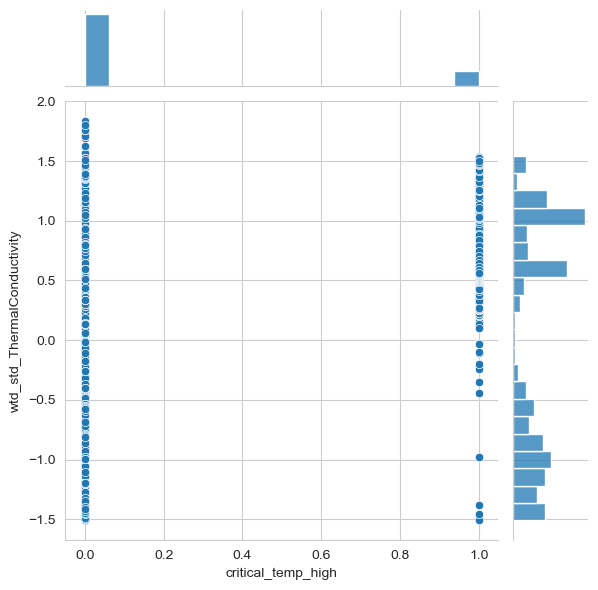

In [25]:
# joint plot (Bi-variate)
# While the Pair plot provides a visual insight into all possible correlations, 
# the Joint plot provides bivariate plots with univariate marginal distributions.
sns.jointplot(x = 'critical_temp_high', y = 'wtd_std_ThermalConductivity', data = Supercoductivity_df_full)
plt.show()


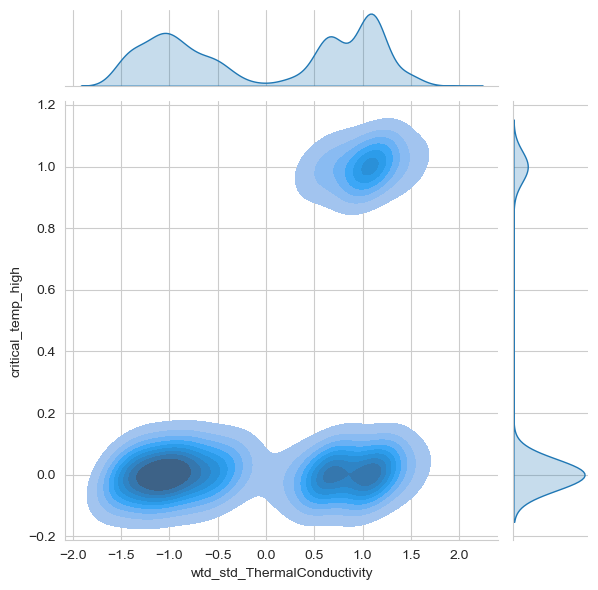

In [26]:
# Multivariate analysis with Contour plot
#Plotting a contour plot using the seaborn library for V11 on x-axis and Class on the y-axis —

sns.jointplot(x = 'wtd_std_ThermalConductivity',  y = 'critical_temp_high' , data = Supercoductivity_df_full,  kind = 'kde', fill = True)
plt.show()


#### v) Experimenting with Attribute Combinations
- PCA for reducing features? (nop)
- Do feature selection? (nop)

#### vi) Findings
- see mainly correlations


# 3) Data preparation
Prepare the data for modeling by cleaning it up and transforming it into a format that can be used by machine learning algorithms.  
- Data Cleaning: Handling missing values and categorical values, removing outliers and duplicates, and ensuring data quality.
- Data Transforming
- Feature Engineering: Transforming variables, creating new features, or selecting relevant variables for analysis.
-- Feature selection: selecting the most useful features to train on among existing features. 
-- Feature extraction: combining existing features to produce a more useful one (e.g. handling missing data, encoding variables, dealing with categorical variables, dimensionality reduction algorithms ...). 
-- Creating new features by gathering new data.
- PCA for reducing features
- Data Visualization after Data Preparation: Presenting insights through plots, charts, and graphs to communicate findings effectively
---

Some of the basic pre-processing techniques:
1. Conversion of data – models can only handle numeric features; hence, categorical and ordinal data must be
somehow converted into numeric features
Results-> All numerical

2. Scaling data – many modelling approaches require some uniformity in the independent variables. Some datasets
Results-> numerical does not seens to have  outliers that may disrupt model results
- Common scaling methods: standardisation, range scaling, power transform, unit norm scaling, custom scaling
- treat outliers?  Scaling: min-max
- StandardScaler is  less affected by outliers then min-max scaling for standardization. 
- min-max between 0 and 1 is better for choose features...  

3. Missing values – do nothing, ignore or impute them.
Results-> There isn´t

4. Outliers detection – there are some error data that might be present in our dataset that deviates drastically from
other observations in a dataset (for example, human weight = 800kg; due to mistyping of extra 0)

5. Check for duplicates
Results-> There is

Apply transformers to atributes in dataframe in order to preprocessing and features extraction
- Handling Text and Categorical Attributes (01) - No need      
- Scaling (02) (04) to all numerical: Test  min-max scaling, perhaps not
- Data Cleaning (03) NA - Missing values, no need
- Data Cleaning (05) Duplicates
 

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Check for duplicates
duplicates = Supercoductivity_df_full.duplicated().sum()
print(f"Supercoductivity_df_full.duplicated().sum() \n {duplicates} \n")
if duplicates > 0:
    # Remove duplicates
    Supercoductivity_df_full.drop_duplicates(inplace=True) #modify the original dataframe instead of creating a new one. 
    print(f"After remove duplicates Supercoductivity_df_full.duplicated().sum() \n {Supercoductivity_df_full.duplicated().sum()} \n")
    print ( f" \n Supercoductivity_df_full shape {Supercoductivity_df_full.shape} \n")



Supercoductivity_df_full.duplicated().sum() 
 70 

After remove duplicates Supercoductivity_df_full.duplicated().sum() 
 0 

 
 Supercoductivity_df_full shape (21104, 83) 



# 4) Modeling / Select and Train Models
Create a model that can be used to make predictions or classify new data. 
- Retrieve Class (y) from the dataset (X)
- Split Data
- Train model (w/cross-validate)

## Retrieve Class (y) from the dataset (X)

Separate the features and target variable

In [28]:
# Separate the features and target variable
Supercoductivity_df = Supercoductivity_df_full.drop(['critical_temp','critical_temp_high'], axis=1) #axis by default is 0 (drop a line) set to  1 (column)
y_1 = Supercoductivity_df_full['critical_temp']
y_2 = Supercoductivity_df_full['critical_temp_high']

print ( f"Supercoductivity_df shape \n {Supercoductivity_df.shape} \n")
# show first 5 column
print (f"Supercoductivity_df.head() \n {Supercoductivity_df.head()}")

print ( f"y_1 shape \n {y_1.shape} \n")
# show first 5 column
print (f"y_1.head() \n {y_1.head()}")

print ( f"y_2 shape \n {y_2.shape} \n")
# show first 5 column
print (f"y_2.head() \n {y_2.head()}")


Supercoductivity_df shape 
 (21104, 81) 

Supercoductivity_df.head() 
    number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0             -2.1737           -2.5469               -1.8316   
1             -2.1737           -2.5469               -1.8316   
2             -2.1737           -2.5469               -1.8316   
3             -2.1737           -2.5469               -1.8316   
4             -2.1737           -1.5994               -0.9850   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0            -1.9110                -1.2742              -3.2043   
1            -1.9110                -1.2742              -3.2043   
2            -1.9110                -1.2742              -3.2043   
3            -1.9110                -1.2742              -3.2043   
4            -1.0041                -0.5006              -3.2043   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                  -2.6712            -2.1218            

## Split Data
Let's split the data into train and test sets.

In [29]:
from sklearn.model_selection import train_test_split

# For the 2 targets 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(Supercoductivity_df, y_1, test_size=0.3, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(Supercoductivity_df, y_2, test_size=0.3, random_state=42)

In [30]:
print (f"X_train_1 \n {X_train_1} \n len X_train_1 {len (X_train_1)}" )
print (f"X_train_1.shape {X_train_1.shape}")
print (f"y_train_1 \n {y_train_1} \n len y_train_1 {len (y_train_1)}")
print (f"y_train_1.shape {y_train_1.shape}")

print (f"X_train_2 \n {X_train_2} \n len X_train_2 {len (X_train_2)}" )
print (f"X_train_2.shape {X_train_2.shape}")
print (f"y_train_2 \n {y_train_2} \n len y_train_2 {len (y_train_2)}")
print (f"y_train_2.shape {y_train_2.shape}")

# summarize class distribution
counter = Counter(y_train_2)
print(counter)
print('In Training DataSet Positive class corresponds to', counter[1]/(counter[0]+counter[1])*100,'% of the dataset.')

X_train_1 
        number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
6157              -1.4777            2.4726                2.9446   
18760             -0.7816           -0.2737               -0.6346   
20988              0.6104            0.5926                0.5440   
7705              -0.7816            1.0156                1.2479   
4104              -0.0856           -1.4090               -0.6087   
...                   ...               ...                   ...   
11334             -0.0856            0.0739               -0.4466   
12014             -0.0856            0.1189               -0.4047   
5432              -0.0856            0.8099                0.0386   
867               -1.4777            2.7290                3.4961   
15863              1.3064            0.1597               -0.6437   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
6157              2.6533                 2.8897              -1.4277   
18760          

# 5) Evaluation 
We evaluate the model’s performance and determine whether it meets the business objectives.
- Evaluation using cross-validate
- Fine-tune Models  
- Model Evaluation on Test Set

## Evaluation using cross-validate
After splitting the data into training and test dataset 
2 Trainning and Test Dataset: 1 for Regression and 2 for Classification
- X_train_1
- X_train_2

CV to choose 2 to 3 models per type of goal (Regression and Classification), with best scores:

Classification scores:
- Precision is the ratio of true positives to the total number of predicted positives. It measures how many of the predicted positive instances are actually positive. A high precision score indicates that the model is good at predicting positive instances.

- Recall is the ratio of true positives to the total number of actual positives. It measures how many of the actual positive instances are correctly predicted as positive. A high recall score indicates that the model is good at identifying positive instances.

- F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1 score indicates that the model is good at both predicting and identifying positive instances.

- Matthews correlation coefficient (MCC) is a metric that is used to evaluate the performance of a classification model. It takes into account true positives, true negatives, false positives, and false negatives and produces a score between -1 and 1. A score of 1 indicates perfect prediction, 0 indicates random prediction, and -1 indicates total disagreement between prediction and observation 

Regression scores:
- R-squared (R2): R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
It measures how well the model fits the data by comparing it to a baseline model that always predicts the mean of the target variable. The higher the R2 score, the better the model’s performance

- Mean Absolute Error (MAE): MAE is a measure of errors between paired observations expressing the same phenomenon. 
It is calculated as the average absolute difference between the actual and predicted values.

- Mean Squared Error (MSE): MSE is a measure of errors between paired observations expressing the same phenomenon. 
It is calculated as the average squared difference between the actual and predicted values.

- Median Absolute Error: Median Absolute Error is a robust measure of errors between paired observations expressing 
the same phenomenon. It is calculated as the median absolute difference between the actual and predicted values.

-  Pearson correlation coefficient is a metric that is used to evaluate the performance of a model. It measures the linear relationship between predicted and actual values. The value of Pearson correlation coefficient ranges from -1 to 1. A value of 1 indicates a perfect positive linear relationship, 0 indicates no linear relationship, and -1 indicates a perfect negative linear relationship

In [20]:
# CV to choose 2 to 3 models per type of goal (Regression and Classification)
# not prepared for pipeline (only Fraud is prepared for pipeline)

from sklearn.metrics import classification_report

## Classification Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

## Regression Models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import numpy as np

#Constants to identify type of model/challenge
REGRESSION = 1
CLASSIFICATION = 2

# Number of models, by type (regressions and classification), that will be fine tuned
N_FINETUNE_MODELS_TYPE = 2

# Number of final reports to print from results, with test dataset
N_FINAL_REPORT = 1

# Save the model scores and present intermediate results (w/ verbose)
# Return the list with the saved scores 
def save_scores(best_estimator, scores, name, results,model_type, verbose):
    if verbose:
        if model_type == CLASSIFICATION:
            print(f"\n {name}")
            print("Precision scores:", scores['test_precision'])
            print("Recall scores:", scores['test_recall'])
            print("f1 scores:", scores['test_f1'])

            print("Scores:", scores)

            print("Mean precision:", np.mean(scores['test_precision']))
            print("Mean recall:", np.mean(scores['test_recall']))
            print("Mean f1:", np.mean(scores['test_f1']))

            print("Standard deviation precision:", np.std(scores['test_precision']))
            print("Standard deviation recall:", np.std(scores['test_recall']))
            print("Standard deviation f1:", np.std(scores['test_f1']))
        elif model_type == REGRESSION:
            print (f"Regression in save score model_type {model_type}")
            
            print("R-squared (r2) scores:", scores['test_r2'])
            print("Mean Absolute Error (MAE) scores:", scores['test_neg_mean_absolute_error'])
            print("Mean Squared Error (MSE) scores:", scores['test_neg_mean_squared_error'])
            print("Median Absolute Error scores:", scores['test_neg_median_absolute_error'])
    
            print("Mean R-squared (r2) score:", scores['test_r2'].mean())
            print("Mean Mean Absolute (MAE) Error score:", scores['test_neg_mean_absolute_error'].mean())
            print("Mean Mean Squared (MSE) Error score:", scores['test_neg_mean_squared_error'].mean())
            print("Mean Median Absolute Error score:", scores['test_neg_median_absolute_error'].mean())
    
            print("Standard deviation of R-squared (r2) score:", scores['test_r2'].std())
            print("Standard deviation of Mean Absolute (MAE) Error score:", scores['test_neg_mean_absolute_error'].std())
            print("Standard deviation of Mean Squared (MSE) Error score:", scores['test_neg_mean_squared_error'].std())        
            print("Standard deviation of Median Absolute Error score:", scores['test_neg_median_absolute_error'].std())
                
    # after verbose save results
    
    if model_type == CLASSIFICATION:
        results.append((name,
                    best_estimator,
                    np.mean(scores['test_precision']), # mean because is test_precision for all the k cv
                    np.mean(scores['test_recall']),
                    np.mean(scores['test_f1']),
                    np.std(scores['test_precision']),
                    np.std(scores['test_recall']),
                    np.std(scores['test_f1']),
                    ))
    elif model_type == REGRESSION:
        # print (f"Regression in save score 2 model_type {model_type}")
        results.append((name,
                   best_estimator,
                    scores['test_r2'].mean(),
                    - scores['test_neg_mean_absolute_error'].mean(),   #positive  scores
                    - scores['test_neg_mean_squared_error'].mean(),    #positive  scores
                    - scores['test_neg_median_absolute_error'].mean(), #positive  scores
                    scores['test_r2'].std(),
                    scores['test_neg_mean_absolute_error'].std(),
                    scores['test_neg_mean_squared_error'].std(),
                    scores['test_neg_median_absolute_error'].std(),
                    ))
    return results


# Sort results and return the sorted result
def sort_results (results,model_type):

    # sorted() is a built-in Python function that sorts an iterable object (e.g., list, tuple, etc.) in 
    # ascending order by default. It can also sort in descending order if the reverse=True argument is passed.
    # In this case, sorted() is used to sort the results list of tuples by the fourth element of each tuple (i.e., F1 score)
    # in descending order. The key argument is set to a lambda function that returns the second element of each tuple. 
    # The reverse=True argument is also passed to sort in descending order.
    
    if model_type == CLASSIFICATION:

        # CLASSIFICATION: Sort models by Highest F1 scores (decreasing)
        results_sorted = sorted(results, key=lambda x: x[4], reverse=True)

    elif model_type == REGRESSION:
        
        # REGRESSION: Sort models by lowest MSE scores (increasing)
        results_sorted = sorted(results, key=lambda x: x[4], reverse=False)
        
    return results_sorted

# Execute final report for N_FINAL_REPORT models
def display_final_report (X_train, y_train, X_test, y_test, results,model_type):
    for n_model in range (N_FINAL_REPORT): # apply only to the first N_FINAL_REPORT 
        best_estimator = results[n_model][1] # best estimator model to obtain classification report
        best_estimator.fit(X_train, y_train)            
        y_pred = best_estimator.predict(X_test)
        print (f"\n best_estimator for X_test, {best_estimator}")
        if model_type == CLASSIFICATION:
            print(classification_report(y_test, y_pred))
            print("\n Matthews correlation coefficient (MCC) score:", matthews_corrcoef(y_test, y_pred))
            #  in cv: make_scorer to create a scorer object for MCC and pass it to the scoring parameter
        elif model_type == REGRESSION:
            final_r2 = r2_score(y_test, y_pred)            
            final_mae = mean_absolute_error(y_test, y_pred)
            final_mse = mean_squared_error(y_test, y_pred)
            #final_rmse = np.sqrt(final_mse)
            neg_median_absolute_error = median_absolute_error(y_test, y_pred)
            print(f" r2: {final_r2:.4f} mae: {final_mae:.4f} mse: {final_mse:.4f} neg_median_absolute_error: {neg_median_absolute_error:.4f}")
            pearson = np.corrcoef(y_test, y_pred)[0][1]
            print("Pearson correlation coefficient score:", pearson)

# Display the model final scores. Receives the ordered results to present
def display_scores (results,model_type):        
    
    noshow = ""
    if model_type == CLASSIFICATION:

        print (f"\n--------------------------Results for Classification Models Performance--------------------------")
        for res in results:
            name = res[0]
            precision = res[2] # [1] is best_estimator
            recall = res[3]
            f1 = res[4]
            std_precision = res[5]
            std_recall = res[6]
            std_f1 = res[7]

            print(f"{name.ljust(25)} | precision     {precision:.4f} | recall     {recall:.4f} | f1     {f1:.4f}")
            print(f"{noshow.ljust(25)} | std_precision {std_precision:.4f} | std_recall {std_recall:.4f} | std_f1 {std_f1:.4f}")
    
    elif model_type == REGRESSION:
        
        print (f"\n--------------------------Results for Regression Models Performance--------------------------")
        for res in results:
            name = res[0]
            r2 = res[2] # [1] is best_estimator
            MAE = res[3] 
            MSE = res[4] 
            median_absolute_error = res[5] 
            std_r2 = res[6]
            std_MAE = res[7]
            std_MSE = res[8]
            std_median_absolute_error = res[9]

            print(f"{name.ljust(25)} | r2     {r2:.4f} | MAE     {MAE:.4f} | MSE     {MSE:.4f} | median_absolute_error     {median_absolute_error:.4f}")
            print(f"{noshow.ljust(25)} | std_r2 {std_r2:.4f} | std_MAE {std_MAE:.4f}  | std_MSE {std_MSE:.4f}  | std_median_absolute_error     {std_median_absolute_error:.4f}")

            
# Test (w/ cross validate) a list of models (regression, classification) and present the results (sorted)
# Return results updated
def test_models (models,scoring, X_train, y_train,cv_k,results,model_type, verbose):
    for name, estimator in models:
        est = estimator
        scores = cross_validate(est, X_train, y_train, cv=cv_k, scoring=scoring)
        #print(f"em test_models antes de chamar save_scores CLASSIFICATION: {CLASSIFICATION} e model_type: {model_type}")
        results = save_scores (est, scores, name, results,model_type, verbose)
    results = sort_results (results,model_type)
    display_scores (results,model_type)
    return results


# Classification Models Parametrization

# Define a list of classification models (tuples containing the name and estimator object for each model)
# using Decision Trees and Linear Models
classification_models = [
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('SVC', SVC()),
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTree', DecisionTreeClassifier())
   ,
    ('GaussianNB', GaussianNB()) # not using  Decision Trees and Linear Models
]


#Dictionary instead of list in order to test if classification name in dic...list is adequate  4 for 
classification_models_dic = {
    'RandomForest': RandomForestClassifier()
    ,
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier()
   ,
    'GaussianNB': GaussianNB() # not using  Decision Trees and Linear Models
}


# The macro option is used to compute the average score
# across all classes. The cross_validate() function returns a dictionary of scores for each fold of the cross-validation.
classification_scoring = {'precision': 'precision_macro', #macro is mean for cv k
           'recall': 'recall_macro',
           'f1': 'f1_macro'}


# Define a list of regression models (tuples containing the name and estimator object for each model)
# using Decision Trees and Linear Models
regression_models = [
    ('RandomForest_Regr', RandomForestRegressor())
    ,                 
    ('GradBoosted_Regr_Trees',  GradientBoostingRegressor()),     
    ('SVC',  SVR()),
    ('LinearModel_Trees',  DecisionTreeRegressor()),                    
    ('DecisionTree_Regr',  DecisionTreeRegressor()),              
    ('Linear_Regr_Tree', LinearRegression())
]

#Dictionary instead of list in order to test if regression name in dic...list is adequate  4 for 
regression_models_dic = {
    'RandomForest_Regr': RandomForestRegressor()
    ,                 
    'GradBoosted_Regr_Trees':  GradientBoostingRegressor(),     
    'SVC':  SVR(),
    'LinearModel_Trees':  DecisionTreeRegressor(),                    
    'DecisionTree_Regr':  DecisionTreeRegressor(),              
    'Linear_Regr_Tree': LinearRegression()
}

regression_scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error']


# Initialize empty list to store results for each model
results_regression = []
results_classification = []
VERBOSE = True

# Testing (w/cross-validation) Regression and  Classificaton Models

# classification without verbose
results_classification= test_models (classification_models,classification_scoring, X_train_2, y_train_2,5,results_classification, CLASSIFICATION, False)
# display classification report for test dataset ....
# display_final_report (X_train_2, y_train_2, X_test_2, y_test_2, results_classification,CLASSIFICATION)

# regression without verbose
results_regression = test_models (regression_models,regression_scoring, X_train_1, y_train_1,5,results_regression, REGRESSION, False)
# display final report for test dataset ....
# display_final_report (X_train_1, y_train_1, X_test_1, y_test_1, results_regression,REGRESSION)
                   

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 


--------------------------Results for Classification Models Performance--------------------------
RandomForest              | precision     0.8928 | recall     0.8848 | f1     0.8886
                          | std_precision 0.0059 | std_recall 0.0121 | std_f1 0.0078
GradientBoosting          | precision     0.8796 | recall     0.8561 | f1     0.8669
                          | std_precision 0.0024 | std_recall 0.0149 | std_f1 0.0085
DecisionTree              | precision     0.8641 | recall     0.8587 | f1     0.8610
                          | std_precision 0.0050 | std_recall 0.0155 | std_f1 0.0084
LogisticRegression        | precision     0.8082 | recall     0.7809 | f1     0.7933
                          | std_precision 0.0084 | std_recall 0.0071 | std_f1 0.0058
SVC                       | precision     0.8020 | recall     0.7585 | f1     0.7772
                          | std_precision 0.0089 | std_recall 0.0079 | std_f1 0.0070
GaussianNB                | precision     0.6641 | 

## Fine-tune Models  
- Optimize hyper parameters (for 2-3 Models per type of goal (Regression and Classification)) with highest cross validate training scores

In [24]:
# Optimize hyper parameters (for 2-3 Models)
# results_regression has an ordered list (by results_regression[4] MSE) ascendent
# results_classification  has an ordered list (by results_regression[4] F1) descendent

# GridSearchCV without pipeline, the grid parameters are "normal"
# param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 15)}

# GridSearchCV with pipeline need pipeline parameters like a list of dictionaries for the pipeline, differente from GridSearchCV 
# without pipeline, check if  param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 15)} are correct 
# in the pipe_parameters down 

# Perform grid search with cross-validation using k=5 for each model
# Using best cross validate models (N_FINETUNE_MODEL_STYPE) from the validation phase
# Return results updated
def optimize_hyperP (results_cv, models, scoring, param_grid, X_train, y_train,cv_k,results,model_type, verbose):
    for n_model in range (N_FINETUNE_MODELS_TYPE): #apply only to N_FINETUNE_MODEL_STYPE to optimize from cv
            model_name_2_find = results_cv[n_model][0]
            if (model_name_2_find in models) and (model_name_2_find in param_grid):
                grid_search = GridSearchCV(estimator=models[model_name_2_find], param_grid=param_grid[model_name_2_find], cv=cv_k)
                grid_search.fit(X_train, y_train) # cv in trainning dataset
                # Print the best hyperparameters and the corresponding mean cross-validation score
                print(f"\n best_estimator_  for {model_name_2_find}: {grid_search.best_estimator_}")
                print(f"\n Best hyperparameters for {model_name_2_find}: {grid_search.best_params_}")
                print(f"\n Cross-validation score for {model_name_2_find}: {grid_search.best_score_:.4f}")
                
                scores = cross_validate(grid_search.best_estimator_, X_train, y_train, cv=cv_k, scoring=scoring)
                results = save_scores (grid_search.best_estimator_, scores, model_name_2_find, results,model_type, verbose) 
                # Store also grid_search.best_estimator_ in results [1] to apply grid_search.best_estimator_ 
            else:
                print (f" ELSE (model_name_2_find in models) and (model_name_2_find in param_grid) {(model_name_2_find in models)} {(model_name_2_find in param_grid)}")
                
    results = sort_results (results,model_type)
    display_scores (results,model_type)
    return results
        
# Classification Models Hyper Parameters Parametrization
class_param_grid = {
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]},
    'GradientBoosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'DecisionTree': {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 15)},    
    'GaussianNB': {}
}

# Regression Models Hyper Parameters Parametrization
regr_param_grid = {
    'RandomForest_Regr': {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2],'max_features': ['auto', 'sqrt', 'log2']},    
    'GradBoosted_Regr_Trees': {'learning_rate': [0.05, 0.1, 0.25],'n_estimators': [50, 100, 150],'max_depth': [3, 5, None],'min_samples_split': [2, 5]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},    
    'LinearModel_Trees': {'max_depth': [None, 5, 10],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]},    
    'DecisionTree_Regr': {'max_depth': [None, 5, 10],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]},
    'Linear_Regr_Tree': {}
}

# Initialize empty list to store results for each gridsearch
results_regr_grid_search = []
results_class_grid_search = []
VERBOSE = False

# Optimizing Hyper Parameters (w/GridSearchCV) Regression and  Classificaton Models

results_class_grid_search = optimize_hyperP (results_classification, classification_models_dic, classification_scoring, class_param_grid, X_train_2, y_train_2,5,results_class_grid_search,CLASSIFICATION, VERBOSE)

results_regr_grid_search = optimize_hyperP (results_regression, regression_models_dic, regression_scoring, regr_param_grid, X_train_1, y_train_1,5,results_regr_grid_search,REGRESSION, VERBOSE)



 best_estimator_  for RandomForest: RandomForestClassifier(max_depth=15, n_estimators=300)

 Best hyperparameters for RandomForest: {'max_depth': 15, 'n_estimators': 300}

 Cross-validation score for RandomForest: 0.9389

 best_estimator_  for GradientBoosting: GradientBoostingClassifier(n_estimators=300)

 Best hyperparameters for GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 300}

 Cross-validation score for GradientBoosting: 0.9338

--------------------------Results for Classification Models Performance--------------------------
RandomForest              | precision     0.8950 | recall     0.8858 | f1     0.8901
                          | std_precision 0.0034 | std_recall 0.0132 | std_f1 0.0063
GradientBoosting          | precision     0.8859 | recall     0.8764 | f1     0.8808
                          | std_precision 0.0035 | std_recall 0.0134 | std_f1 0.0074


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr


 best_estimator_  for RandomForest_Regr: RandomForestRegressor(max_features='log2', n_estimators=150)

 Best hyperparameters for RandomForest_Regr: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

 Cross-validation score for RandomForest_Regr: 0.9190

 best_estimator_  for LinearModel_Trees: DecisionTreeRegressor()

 Best hyperparameters for LinearModel_Trees: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

 Cross-validation score for LinearModel_Trees: 0.8687

--------------------------Results for Regression Models Performance--------------------------
RandomForest_Regr         | r2     0.9189 | MAE     5.6159 | MSE     95.5966 | median_absolute_error     2.5913
                          | std_r2 0.0055 | std_MAE 0.1592  | std_MSE 6.9426  | std_median_absolute_error     0.0481
LinearModel_Trees         | r2     0.8666 | MAE     6.6153 | MSE     157.0879 | median_absolute_error     2.5267
             

## Model Evaluation on Test Set 

In [25]:
    # Return results updated
    # results_class_grid_search
    # results_regr_grid_search 

    # Classification final Report with test set 
    display_final_report (X_train_2, y_train_2, X_test_2, y_test_2, results_class_grid_search,CLASSIFICATION)

    # Regression final report with test set
    display_final_report (X_train_1, y_train_1, X_test_1, y_test_1, results_regr_grid_search,REGRESSION)


 best_estimator for X_test, RandomForestClassifier(max_depth=15, n_estimators=300)
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5271
           1       0.84      0.82      0.83      1061

    accuracy                           0.94      6332
   macro avg       0.90      0.89      0.90      6332
weighted avg       0.94      0.94      0.94      6332


 Matthews correlation coefficient (MCC) score: 0.796140890198861

 best_estimator for X_test, RandomForestRegressor(max_features='log2', n_estimators=150)
 r2: 0.9208 mae: 5.4896 mse: 92.5052 neg_median_absolute_error: 2.4929
Pearson correlation coefficient score: 0.9596881009375036
